# Task: Data Visualization

In [1]:
import pandas as pd
df = pd.read_csv('Dataset .csv')

#handle missing values
# Replace NaN values in 'Cuisines' column with the mode of the column
df['Cuisines'] = df['Cuisines'].fillna(df['Cuisines'].mode()[0])
missing_values = df.isnull().sum()
print(missing_values)

# Convert categorical columns to 'category' type
categorical_columns = [ "Restaurant Name", "City", "Address", "Locality", "Locality Verbose","Cuisines", "Currency", "Rating color", "Rating text" ]
df[categorical_columns] = df[categorical_columns].astype('category')

# Convert binary columns to boolean type (assuming "Yes"/"No" values)
binary_columns = ["Has Table booking", "Has Online delivery", "Is delivering now", "Switch to order menu"]
df[binary_columns] = df[binary_columns].map(lambda x: True if x == "Yes" else False)
print(df.dtypes)

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
Restaurant ID              int64
Restaurant Name         category
Country Code               int64
City                    category
Address                 category
Locality                category
Locality Verbose        category
Longitude                float64
Latitude                 float64
Cuisines                category
Average Cost for two       int64
Currency                category
Has Table booking           bool
Has Online d

### 1. Distribution of Ratings

Use a histogram and boxplot to represent the distribution of ratings in the dataset.

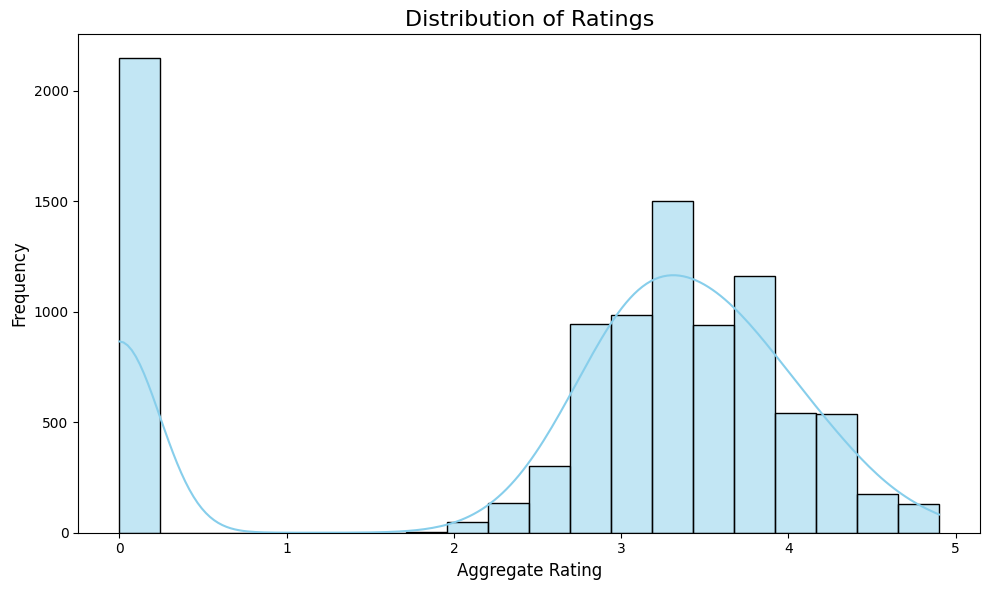

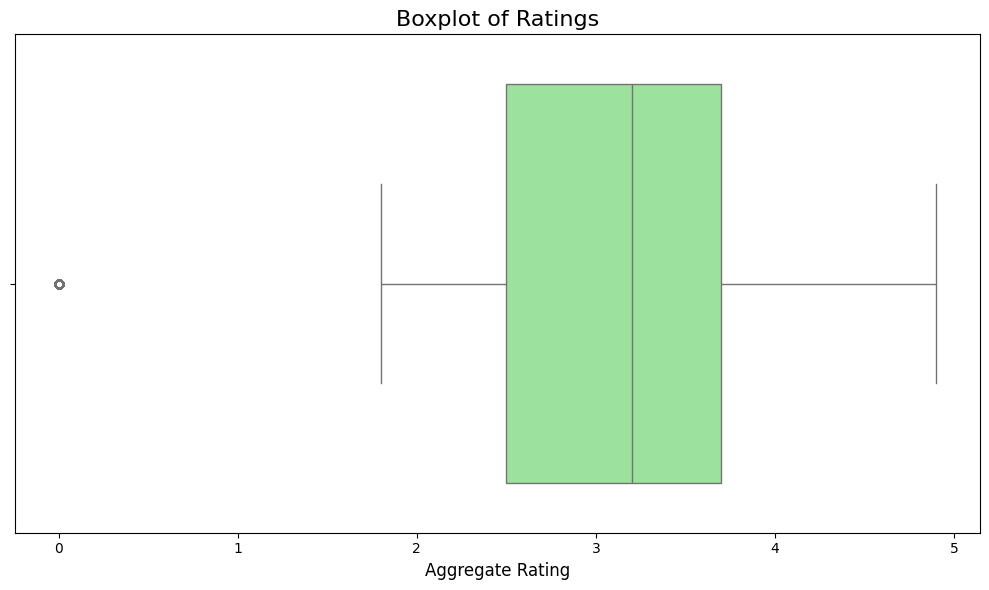

In [2]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

# Boxplot of ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='Aggregate rating', data=df, color='lightgreen')
plt.title('Boxplot of Ratings', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=12)
plt.tight_layout()
plt.show()


### 2. Compare Average Ratings of Different Cuisines

Use a bar plot to compare average ratings of the top cuisines.

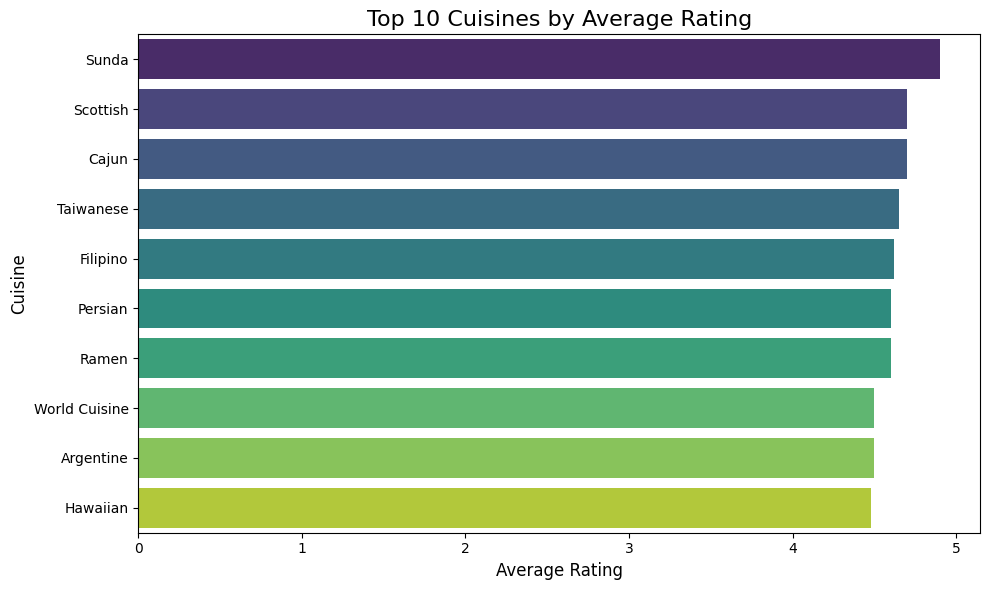

In [9]:
import warnings 
warnings.filterwarnings('ignore')


# Assuming your DataFrame is named 'df'
df['Cuisines'] = df['Cuisines'].str.split(',').str[0].str.strip()

# Group by simplified cuisines and calculate the average rating
cuisine_avg_rating = (
    df.groupby('Cuisines')['Aggregate rating']
    .mean()
    .sort_values(ascending=False)
    .head(10)  # Select the top 10 cuisines
)

# Plot the cleaned data
plt.figure(figsize=(10, 6))
sns.barplot(
    x=cuisine_avg_rating.values, 
    y=cuisine_avg_rating.index, 
    palette='viridis'
)
plt.title('Top 10 Cuisines by Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Cuisine', fontsize=12)
plt.tight_layout()
plt.show()


### 3. Compare Average Ratings of Different Cities

Use a bar plot to compare average ratings of the top cities.

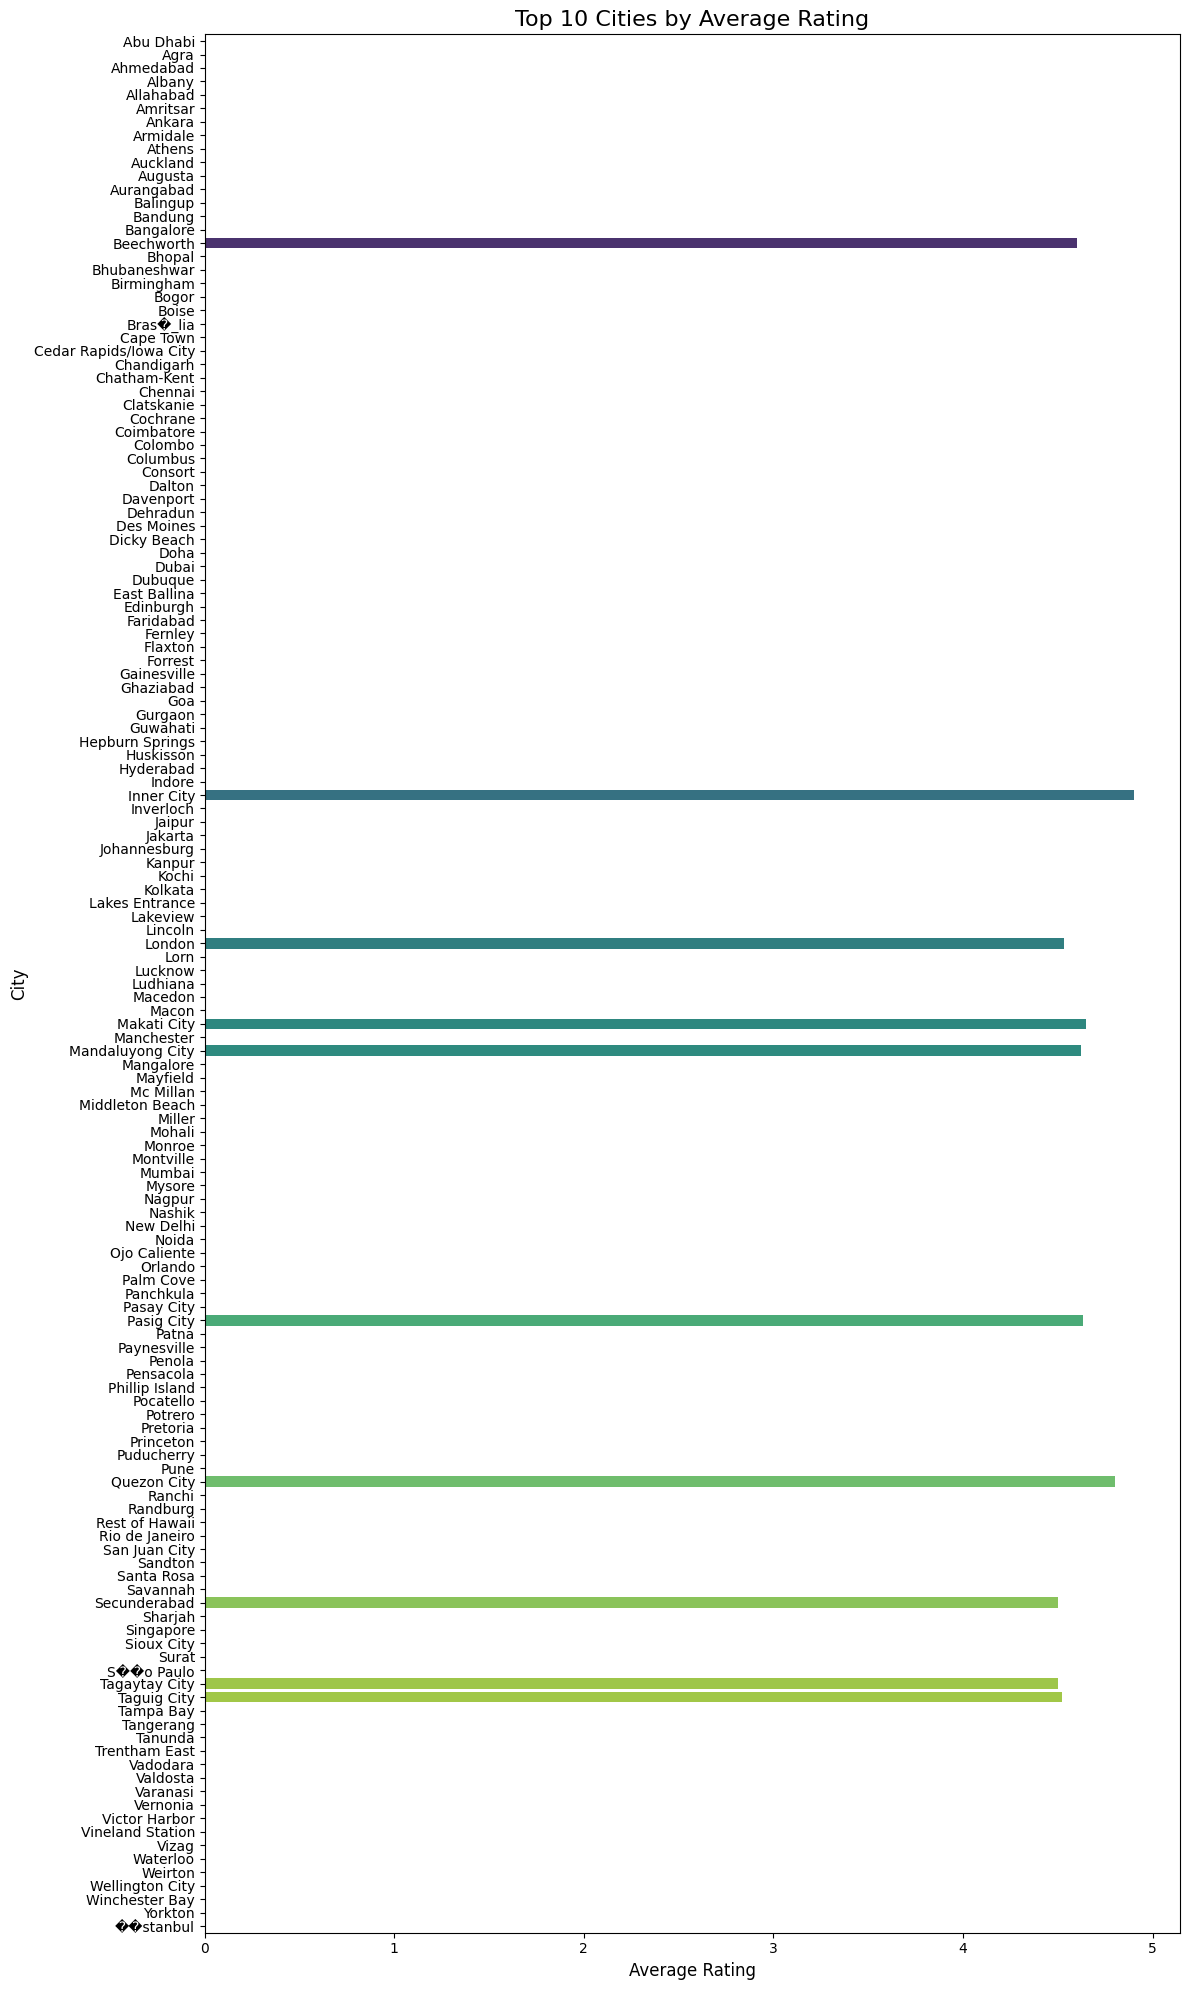

In [10]:
# Grouping by cities and calculating average rating
city_rating = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

# Restrict to the top 10 cities by average rating
city_rating_top = city_rating.head(10)

# Bar plot for average ratings of cities
plt.figure(figsize=(12, 20))
sns.barplot(x=city_rating_top.values, y=city_rating_top.index, palette='viridis')
plt.title('Top 10 Cities by Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.tight_layout()
plt.show()


### 4. Relationship Between Features and Target Variable

Visualize relationships between different features like Votes, Price for Two, and Aggregate Rating.

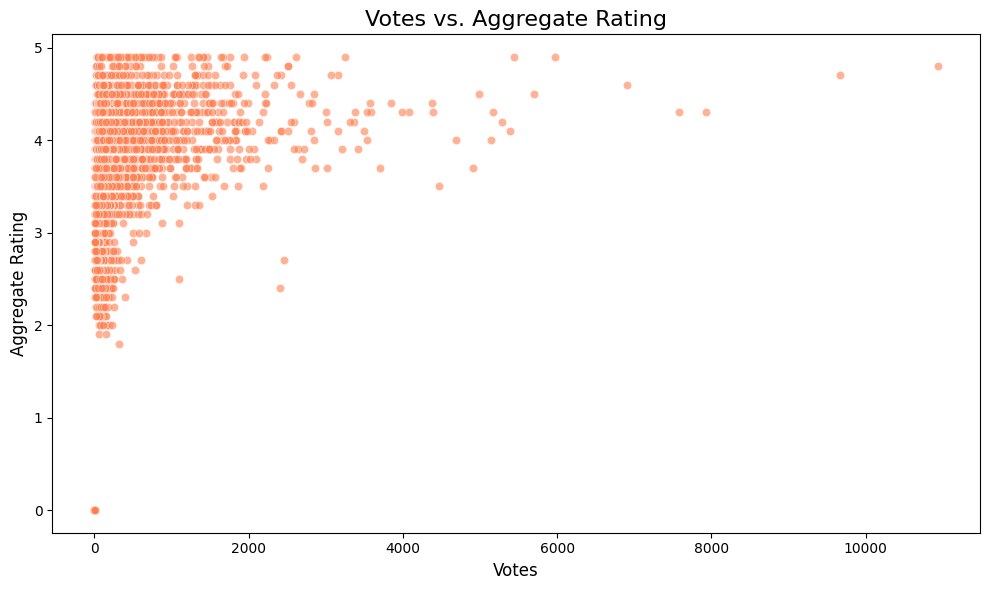

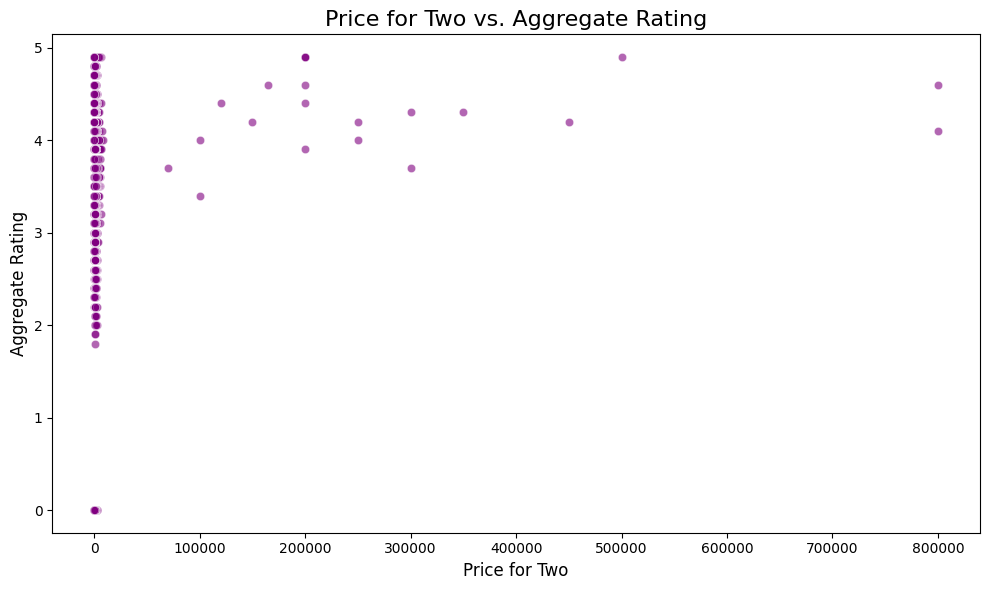

In [11]:
# Scatterplot: Votes vs. Aggregate Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df, alpha=0.6, color='coral')
plt.title('Votes vs. Aggregate Rating', fontsize=16)
plt.xlabel('Votes', fontsize=12)
plt.ylabel('Aggregate Rating', fontsize=12)
plt.tight_layout()
plt.show()

# Scatterplot: Price for Two vs. Aggregate Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Cost for two', y='Aggregate rating', data=df, alpha=0.6, color='purple')
plt.title('Price for Two vs. Aggregate Rating', fontsize=16)
plt.xlabel('Price for Two', fontsize=12)
plt.ylabel('Aggregate Rating', fontsize=12)
plt.tight_layout()
plt.show()


### 5. Optional: Heatmap for Correlation

Show correlations between numerical features like Votes, Aggregate Rating, and Price for Two.

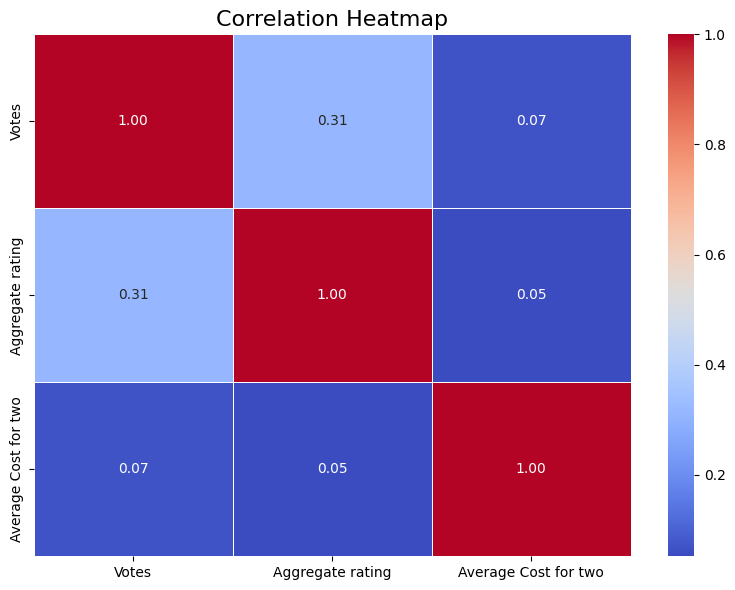

In [12]:
# Heatmap for correlations
plt.figure(figsize=(8, 6))
correlation_matrix = df[['Votes', 'Aggregate rating', 'Average Cost for two']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()


#### Expected Insights:

Rating Distribution: A histogram will show if ratings are skewed or normally distributed, while the boxplot highlights outliers.

Top-Rated Cuisines/Cities: Bar plots will identify cuisines and cities with the highest average ratings.

Feature Relationships: Scatterplots will reveal how Votes or Price for Two impact ratings.

Correlation: A heatmap provides a quick overview of feature interdependencies.